In [155]:
#Importations des packages

# Importation de la bibliothèque pandas pour la manipulation des données
import pandas as pd

# Importation de la bibliothèque numpy pour les opérations numériques
import numpy as np

# Importation d'une fonction pour créer une matrice de dispersion
from pandas.plotting import scatter_matrix

# Importation de la bibliothèque matplotlib pour la visualisation
import matplotlib.pyplot as plt

# Importation de la bibliothèque seaborn pour des graphiques statistiques plus avancés
import seaborn as sns

# Importation de scikit-learn pour la prétraitement des données
from sklearn import preprocessing

# Importation d'une classe pour standardiser les données
from sklearn.preprocessing import StandardScaler

# Importation de scikit-learn pour l'analyse en composantes principales (PCA)
from sklearn.decomposition import PCA

# Importation du KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [156]:
cameras = pd.read_csv('camera_dataset.csv')
cameras.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [157]:
cameras.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')

Ce dataset contient des informations techniques et commerciales sur ,différents modèles d'appareils photo numériques produits.
Chaque ligne représente un modèle spécifique, avec des colonnes fournissant les caractéristiques principales et les spécifications techniques suivantes :

**Model :** Nom du modèle de l'appareil photo.

**Release date :** Année de sortie du modèle.

**Max resolution / Low resolution :** Résolutions maximale et minimale prises en charge par l'appareil photo (en pixels).

**Effective pixels :** Nombre effectif de pixels capturés par le capteur (en mégapixels).

**Zoom wide (W) / Zoom tele (T) :** Longueur focale (en mm) aux extrémités grand-angle (W) et téléobjectif (T).

**Normal focus range :** Distance minimale à laquelle l'appareil peut effectuer une mise au point normale (en mm).

**Macro focus range :** Distance minimale pour la mise au point en mode macro (en mm).

**Storage included :** Capacité de stockage intégrée (en Mo).

**Weight (inc. batteries) :** Poids total de l'appareil avec les batteries incluses (en grammes).

**Dimensions :** Dimensions physiques de l'appareil photo (en mm).

**Price :** Prix du modèle (en dollars).

In [158]:
# Afficher les lignes avec des valeurs manquantes
missing_data = cameras[cameras.isnull().any(axis=1)]
missing_data

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
345,HP Photosmart R927,2006,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0
346,HP Photosmart R937,2007,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


In [159]:
l1 =len(cameras)
#dropna() permet de supprimer les observations pour lesquels il manque des informations
cameras = cameras.dropna(axis=0)
print(f"{abs(len(cameras)-l1)} observations supprimées")


2 observations supprimées


In [160]:
# suppression des colonnes non numériques
cameras_clean = cameras.drop(columns = ["Model"])
n = cameras_clean.shape[0] # nb lignes
p = cameras_clean.shape[1] # nb colonnes
print(f"{n} modèles | {p} caractéristiques")

1036 modèles | 12 caractéristiques


In [161]:
#Analyse descriptive des données
print(cameras.describe())

       Release date  Max resolution  Low resolution  Effective pixels  \
count   1036.000000     1036.000000     1036.000000       1036.000000   
mean    2003.584942     2473.084942     1774.859073          4.589768   
std        2.724291      759.385536      829.480329          2.842849   
min     1994.000000        0.000000        0.000000          0.000000   
25%     2002.000000     2048.000000     1120.000000          3.000000   
50%     2004.000000     2560.000000     2048.000000          4.000000   
75%     2006.000000     3072.000000     2560.000000          7.000000   
max     2007.000000     5616.000000     4992.000000         21.000000   

       Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
count    1036.000000    1036.000000          1036.00000        1036.000000   
mean       32.955598     121.544402            44.13417           7.785714   
std        10.341229      93.544197            24.16390           8.103702   
min         0.000000       0.0

**1- Release date :**
   - Les dates de sortie vont de 1994 à 2007.
   - La plupartdes appareils ont été lancés entre 2002 (25e percentile) et 2006 (75e percentile).
   
**2- Max resolution & Low resolution :**
   - Résolution maximale moyenne : ~2473 pixels, avec un maximum de 5616 pixels.
   - Résolution minimale moyenne : ~1775 pixels, avec des modèles ayant une résolution basse de 0 pixels.
   
**3- Effective pixels :**
   - Le nombre moyen de pixels effectifs est ~4,6 mégapixels.
   - Les valeurs vont de 0 à 21 mégapixels, indiquant des variations importantes entre les modèles.

**4- Zoom wide (W) & Zoom tele (T)**
   - Zoom grand-angle moyen : ~33 mm, téléobjectif moyen : ~122 mm.
   - Les plages de zoom sont variées, allant de 0 à 518 mm.

**5- Normal focus range & Macro focus range**
   - Distance focale normale moyenne : ~44 mm, avec un maximum de 120 mm.
   - Distance macro moyenne : ~7,8 mm, atteignant un maximum de 85 mm.
   
**6- Storage included**
   - La capacité moyenne de stockage incluse est de ~17 Mo.
   - Certains modèles n'ont pas de stockage intégré, tandis que d'autres atteignent jusqu'à 450 Mo.

**7- Weight (inc. batteries)**
   - Le poids moyen est de ~319 grammes, avec des modèles très légers (0 g) et d'autres lourds (1860 g).

**8- Dimensions**
   - Moyenne : ~105 mm
   - Des modèles compacts (~0 mm) à très grands (240 mm)

**9- Price**
   - Prix moyen : ~458 dollars.
   - Variations importantes : des appareils abordables (14 dollars) aux très coûteux (7999 dollars).


array([[<Axes: xlabel='Release date', ylabel='Release date'>,
        <Axes: xlabel='Max resolution', ylabel='Release date'>,
        <Axes: xlabel='Low resolution', ylabel='Release date'>,
        <Axes: xlabel='Effective pixels', ylabel='Release date'>,
        <Axes: xlabel='Zoom wide (W)', ylabel='Release date'>,
        <Axes: xlabel='Zoom tele (T)', ylabel='Release date'>,
        <Axes: xlabel='Normal focus range', ylabel='Release date'>,
        <Axes: xlabel='Macro focus range', ylabel='Release date'>,
        <Axes: xlabel='Storage included', ylabel='Release date'>,
        <Axes: xlabel='Weight (inc. batteries)', ylabel='Release date'>,
        <Axes: xlabel='Dimensions', ylabel='Release date'>,
        <Axes: xlabel='Price', ylabel='Release date'>],
       [<Axes: xlabel='Release date', ylabel='Max resolution'>,
        <Axes: xlabel='Max resolution', ylabel='Max resolution'>,
        <Axes: xlabel='Low resolution', ylabel='Max resolution'>,
        <Axes: xlabel='Effective

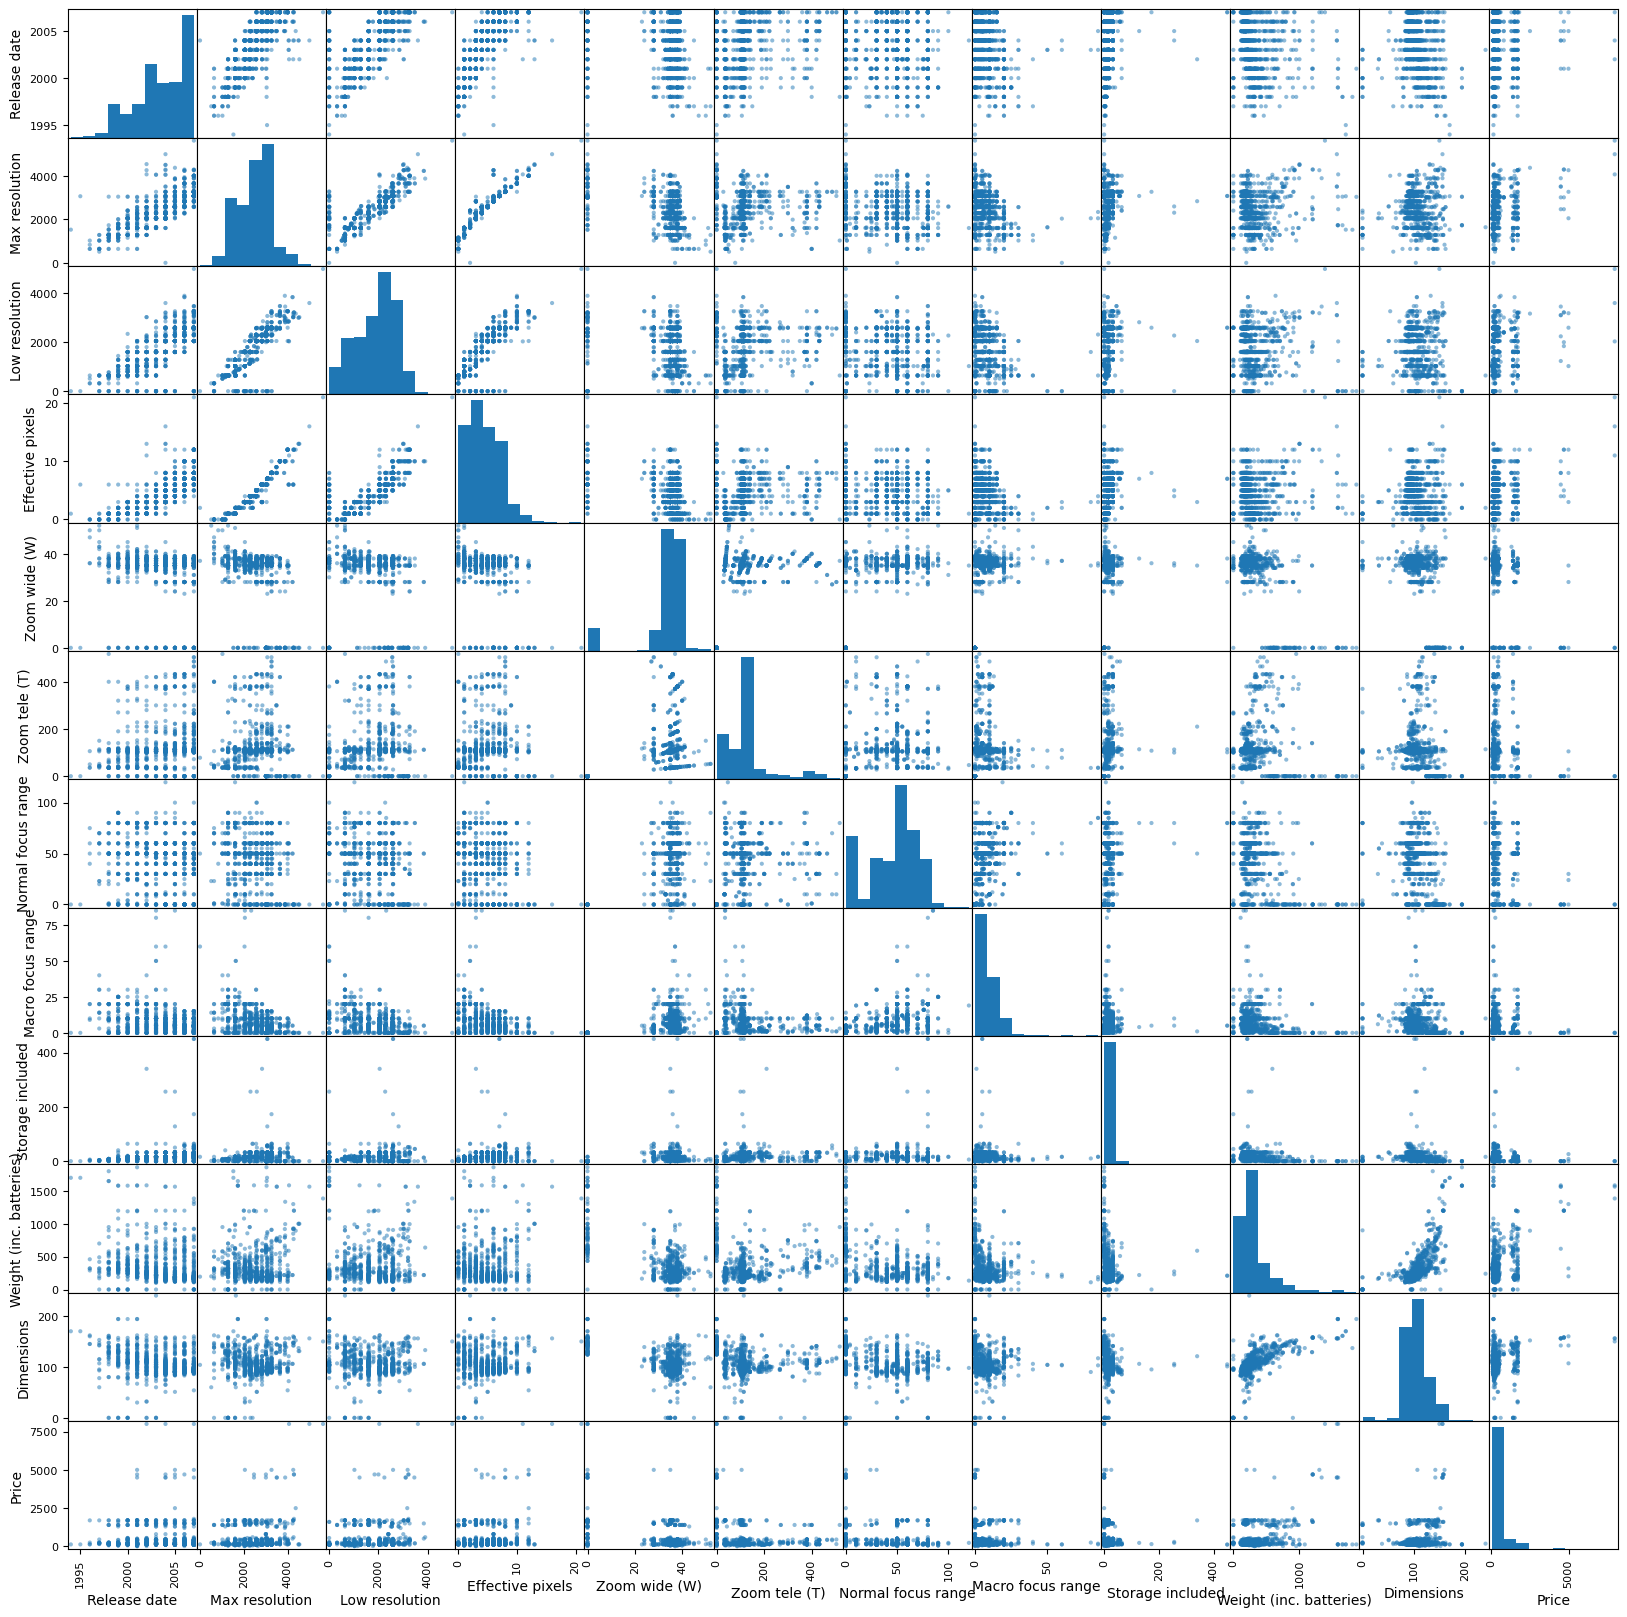

In [162]:
#Analyse graphique bidimentionnelle
scatter_matrix(cameras,figsize=(20,20))

**scatterplot** matrix montre les relations entre les variables numériques du dataset des appareils photo

- **Max resolution / Low resolution** vs. **Effective pixels** : Une forte corrélation positive, car les appareils avec plus de pixels effectifs offrent généralement une résolution maximale plus élevée.
- **Max resolution** vs. **Low resolution** : Une forte corrélation positive, car les appareils offrant une meilleure résolution maximale ont également une résolution basse plus performante.
- **Weight vs. Dimensions** : Les appareils plus grands ont tendance à être plus lourds, montrant une relation linéaire claire.


<Axes: >

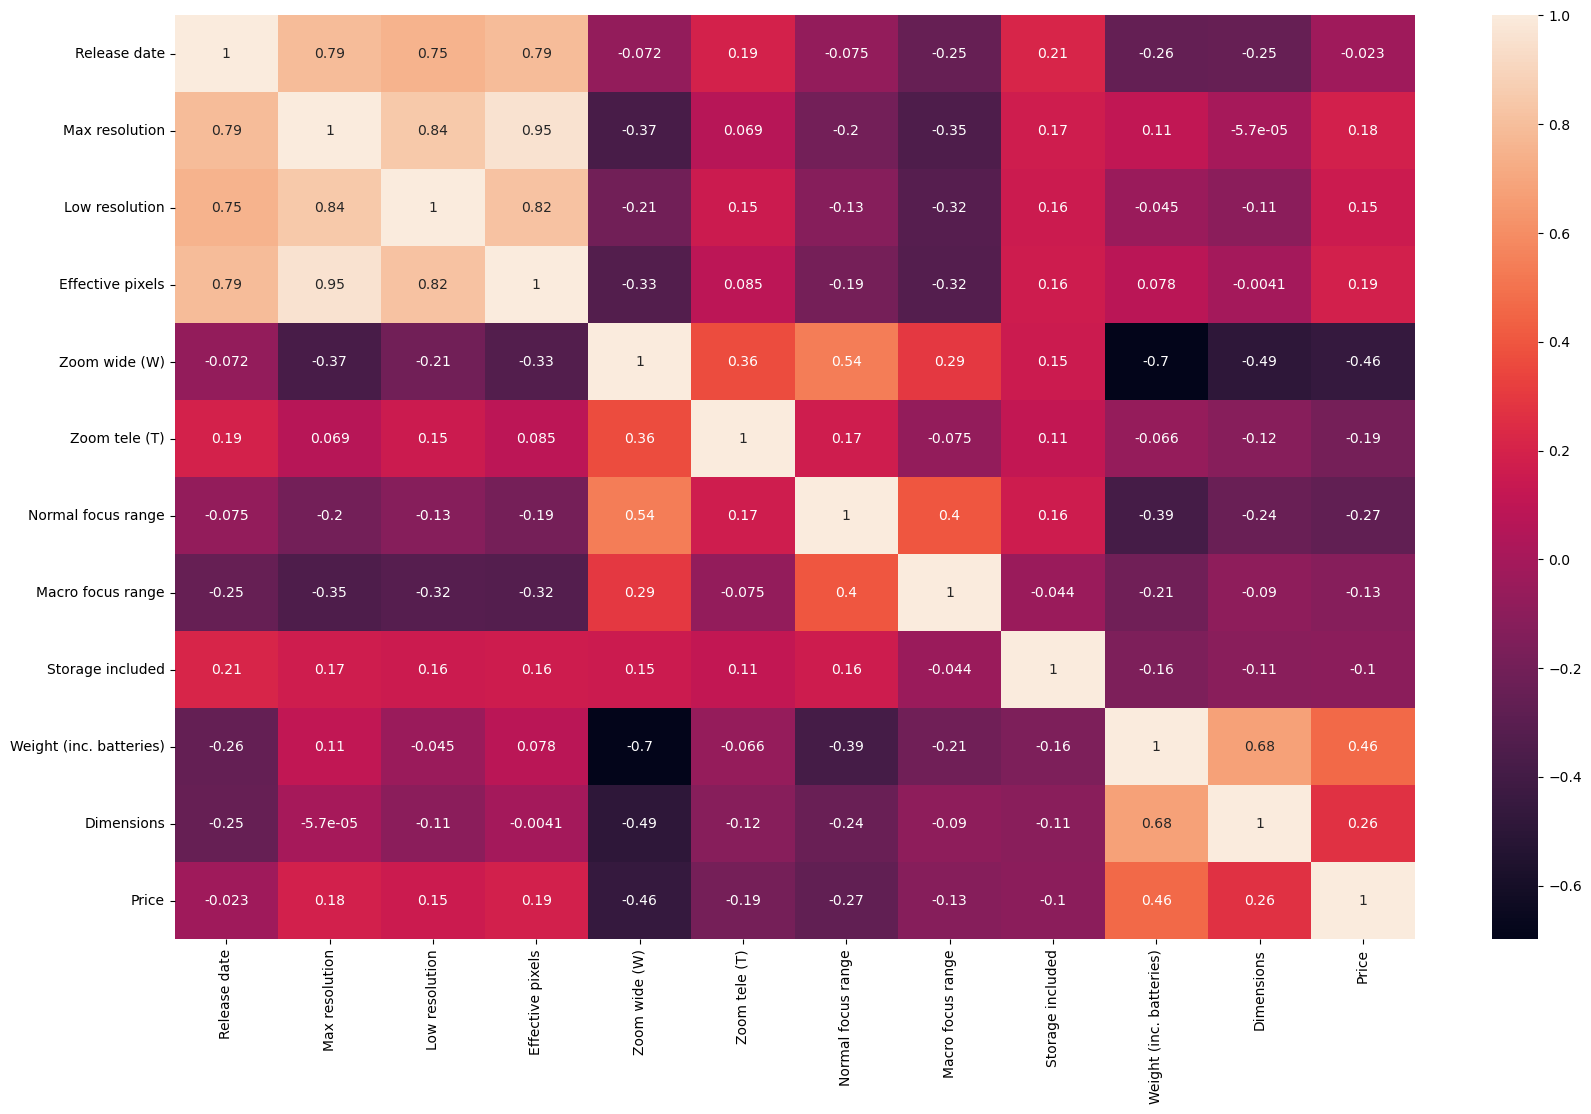

In [163]:
#matrice de correlation des variables quantitatives
corr = cameras.corr(numeric_only = True)
plt.subplots(figsize=(20,12))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True)

Le **heatmap** montre les relations entre les variables quantitatives sous forme de corrélations (valeurs entre -1 et 1) :

- **Release date vs. Max resolution / Low resolution / Effective pixels (0.75 à 0.79) :** Une corrélation modérée qui reflète une amélioration progressive de la résolution des appareils au fil du temps.
- **Max resolution vs. Effective pixels (0.95) :** Une très forte corrélation, montrant que les appareils avec une résolution maximale plus élevée possèdent également un plus grand nombre de pixels effectifs.
- **Max resolution vs. Low resolution (0.84) :** Une forte corrélation, indiquant que les appareils offrant une meilleure résolution maximale ont également une résolution basse plus performante.
- **Weight (inc. batteries) vs. Dimensions (0.68) :** Une corrélation positive significative, suggérant que les appareils avec des dimensions plus importantes sont généralement plus lourds.
- **Zoom wide (W) vs. Weight (inc. batteries) (-0.70) :** Une forte corrélation négative, montrant que les appareils avec un zoom grand-angle plus développé tendent à être plus légers.

In [164]:
#Determiner les valeurs et vecteurs probres de la matrice de corrélation
eig_vals, eig_vecs = np.linalg.eig(corr)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 3.74453655e-01  3.08419657e-01 -8.07754331e-02 -1.91106343e-02
  -5.85454746e-02  8.56492958e-02 -9.77731462e-02  1.51929844e-01
   1.71038610e-02 -5.10364497e-01 -6.45332442e-01 -1.92737713e-01]
 [ 4.68286328e-01  1.29594555e-01 -5.05865364e-02  1.14383717e-01
  -7.54309592e-02  1.17245824e-01  2.67598720e-02 -9.06653980e-02
  -7.56860474e-01  2.01046341e-01  5.86018647e-02  3.21257264e-01]
 [ 4.20837307e-01  2.00830758e-01 -3.59504858e-02  5.96001281e-02
  -1.30385847e-01 -2.26655295e-02  5.97717756e-02  8.88662952e-02
   9.25787058e-02 -1.88738032e-01  6.67358932e-01 -5.09090827e-01]
 [ 4.59822817e-01  1.40910714e-01 -5.19903621e-02  1.19263973e-01
  -1.00978636e-01  9.81659103e-02  2.19111085e-03  5.33711378e-04
   6.39902172e-01  2.84947414e-01  4.02591505e-03  4.91178086e-01]
 [-2.80620214e-01  4.01690922e-01  1.33779751e-01 -5.67921732e-02
  -7.11076945e-02 -1.55748180e-01  6.15821936e-02  4.82894088e-01
  -6.58381089e-02 -3.88073428e-01  2.60083558e-01  4.99902

- **Valeurs propres (eig_vals) :** Les valeurs propres permettent d'identifier les axes principaux (ou composantes principales) dans les données, en vue d'une réduction de dimension comme dans une analyse en composantes principales (ACP).
- **Vecteurs propres (eig_vecs) :** Ces vecteurs définissent les axes des nouvelles dimensions dans l’espace des données (composantes principales). Chaque vecteur propre donne les coefficients (poids) des variables d'origine dans le nouveau système de coordonnées.

In [165]:
#print('Moyenne \n%s' %np.mean(cameras,axis=0))
print('Moyenne \n%s' %cameras.mean(numeric_only=True))

#print('Ecart-type \n%s' %np.std(cameras,axis=0))
print('ecart-type \n%s' %cameras.std(numeric_only=True))

Moyenne 
Release date               2003.584942
Max resolution             2473.084942
Low resolution             1774.859073
Effective pixels              4.589768
Zoom wide (W)                32.955598
Zoom tele (T)               121.544402
Normal focus range           44.134170
Macro focus range             7.785714
Storage included             17.447876
Weight (inc. batteries)     319.265444
Dimensions                  105.363417
Price                       457.921815
dtype: float64
ecart-type 
Release date                 2.724291
Max resolution             759.385536
Low resolution             829.480329
Effective pixels             2.842849
Zoom wide (W)               10.341229
Zoom tele (T)               93.544197
Normal focus range          24.163900
Macro focus range            8.103702
Storage included            27.440655
Weight (inc. batteries)    260.410137
Dimensions                  24.262761
Price                      761.088735
dtype: float64


- **Les moyennes** fournissent une mesure centrale pour chaque variable quantitative. 
   - Price : Moyenne de 457.92, représentant le prix moyen des caméras dans l'échantillon.

- **Les écarts-types montrent** la dispersion ou la variation des valeurs autour de la moyenne.
   - Price : Écart-type de 761.09, suggérant une forte variabilité des prix entre les différents modèles.

In [166]:
# Extraction des variables quantitatives du dataframe cameras
x = cameras.iloc[:,1:].values
# Extraction de la variable cible (nom du modèle de caméra) du dataframe cameras
y = cameras.iloc[:,0]

# Standardisation des variables quantitatives en utilisant la fonction scale de scikit-learn
camerascr = preprocessing.scale(x)
#print(camerascr)

- **La variable x** contient les valeurs des colonnes quantitatives (toutes sauf la première).
- **La variable y** représente la variable cible, qui correspond à la première colonne du DataFrame (le nom des modèles de caméra). 


In [167]:
#Since PCA is effected by scale, we need to scale features in the data before applying PCA.
x = StandardScaler().fit_transform(x)
#print(x)

In [168]:
#Application ACP
#instanciation
acp = PCA(n_components=12)
acp.fit(x)

PCA(n_components=12)

In [169]:
#nombre de composantes calculées
print('Nombre de composantes : %s \n' %acp.n_components_)
#variance expliquée
print('variance expliquée : \n %s \n' %acp.explained_variance_)
#proportion de variance expliquée (% information)
print("proportion de variance expliquée : \n %s \n" %acp.explained_variance_ratio_)
eigval = acp.explained_variance_

Nombre de composantes : 12 

variance expliquée : 
 [3.96229758 2.99807761 1.06459973 0.98488538 0.87514615 0.69591346
 0.51580957 0.34423448 0.22706153 0.18515353 0.11696886 0.04144632] 

proportion de variance expliquée : 
 [0.32987275 0.24959864 0.08863101 0.08199456 0.07285845 0.05793681
 0.04294264 0.02865852 0.01890353 0.01541457 0.009738   0.00345053] 



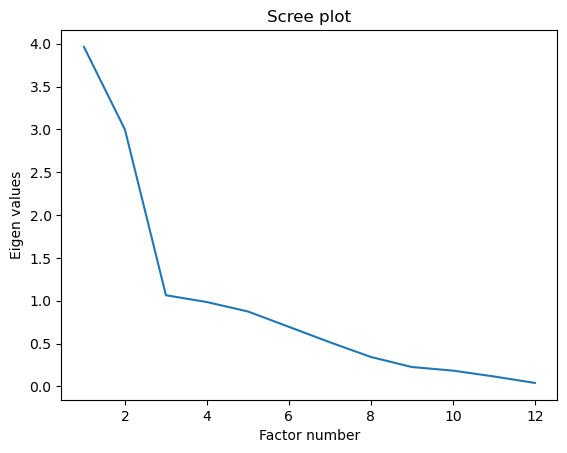

In [170]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

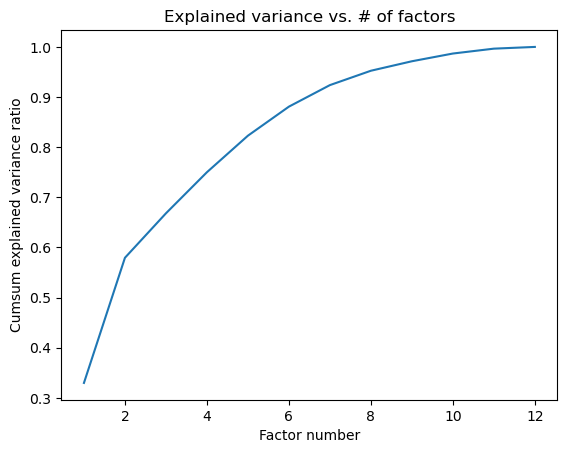

In [171]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [172]:
#proportion de variance expliquée (% information)
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(12)], 
        "Variance expliquée" : acp.explained_variance_,
        "% variance expliquée" : np.round(acp.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(acp.explained_variance_ratio_) * 100)
    }
)
print(eig)

   Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0       Dim1            3.962298                  33.0                   33.0
1       Dim2            2.998078                  25.0                   58.0
2       Dim3            1.064600                   9.0                   67.0
3       Dim4            0.984885                   8.0                   75.0
4       Dim5            0.875146                   7.0                   82.0
5       Dim6            0.695913                   6.0                   88.0
6       Dim7            0.515810                   4.0                   92.0
7       Dim8            0.344234                   3.0                   95.0
8       Dim9            0.227062                   2.0                   97.0
9      Dim10            0.185154                   2.0                   99.0
10     Dim11            0.116969                   1.0                  100.0
11     Dim12            0.041446                   0.0          

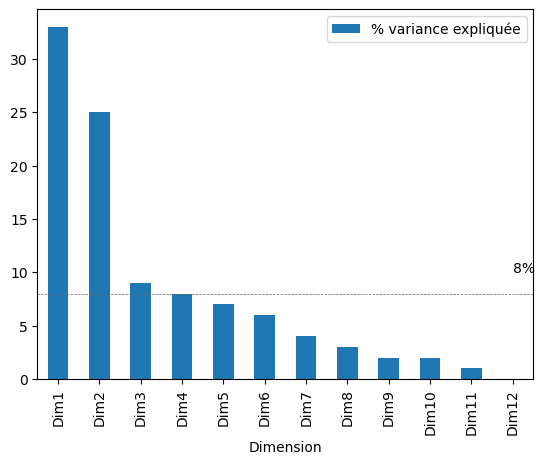

In [173]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(11, 10, "8%")
plt.axhline(y = 8, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 8 = 100 / 16 (nb dimensions)
plt.show()

In [174]:
#on affiche les deux premiers axes
cameras_acp = acp.fit_transform(x)
cameras_acp


array([[-4.58598772e+00,  7.10907565e-01, -7.01022699e-01, ...,
         5.45765027e-03,  1.05764521e-01,  2.18106301e-01],
       [-2.49085685e+00,  2.18088352e+00,  1.39222073e+00, ...,
         1.26585979e-01,  3.90675266e-01,  1.65986378e-01],
       [-3.54812416e+00, -6.48658416e-01, -1.85955835e+00, ...,
         7.60953673e-01, -2.50991673e-01,  5.53644844e-01],
       ...,
       [-1.79898437e+00,  1.35750734e-01,  3.85798653e-02, ...,
         2.14599678e-01,  1.80080586e-01,  3.34791614e-03],
       [-1.47427372e+00, -2.86565786e-02,  8.93772784e-02, ...,
         2.45838901e-01,  2.37687453e-01, -3.24261937e-01],
       [-2.56869357e+00,  5.52330067e-02, -1.29718627e+00, ...,
         1.63950919e-02, -2.78033156e-01, -9.26800935e-02]])

In [175]:
cameras_pca_df = pd.DataFrame({'id':cameras_clean.columns,'COR1':acp.components_[0],'COR2':acp.components_[1]})
cameras_pca_df

,id,COR1,COR2
0,Release date,0.374454,-0.308420
1,Max resolution,0.468286,-0.129595
2,Low resolution,0.420837,-0.200831
3,Effective pixels,0.459823,-0.140911
4,Zoom wide (W),-0.280620,-0.401691
5,Zoom tele (T),0.015607,-0.231099
6,Normal focus range,-0.211834,-0.291105
7,Macro focus range,-0.259591,-0.074797
8,Storage included,0.062408,-0.211445
9,Weight (inc. batteries),0.142899,0.470833


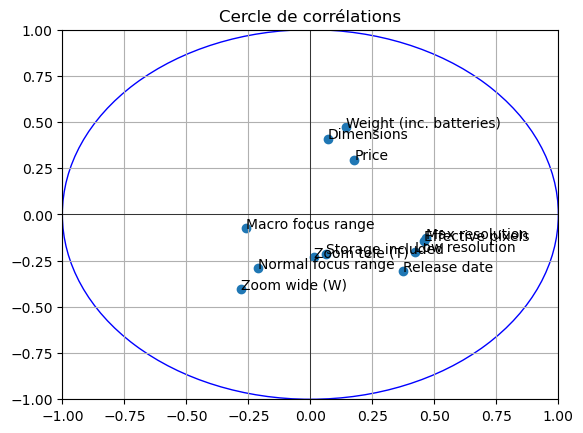

In [176]:
# Cercle de corrélations
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.set_title("Cercle de corrélations")

for i in range(len(cameras_pca_df)):
    ax.annotate(cameras_pca_df['id'][i], (cameras_pca_df['COR1'][i], cameras_pca_df['COR2'][i]))
# Afficher le cercle
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)
# Afficher la grille
plt.grid(True)
ax.scatter(cameras_pca_df['COR1'], cameras_pca_df['COR2'])
plt.show()

- **Le cercle de corrélations** est un outil graphique utilisé en analyse en composantes principales (ACP) pour visualiser les relations entre les variables d'un jeu de données. Il permet de comprendre comment les différentes caractéristiques d'un ensemble de données sont liées entre elles et d'identifier les groupes de variables qui varient de manière similaire.

Les variables semblent se regrouper en deux clusters principaux :
- **Caractéristiques techniques:** Résolution, zoom, distances de mise au point. Ces variables sont fortement corrélées entre elles et ont une influence négative sur le premier axe factoriel **(F1)**, ce qui est logique : une haute résolution est souvent associée à un zoom important et à des distances de mise au point plus courtes. 

- **Caractéristiques commerciales:** Poids, dimensions, prix. Ces variables sont également corrélées et ont une influence positive sur le premier axe factoriel **(F1)**., indiquant que les appareils plus lourds et plus grands sont généralement plus chers.

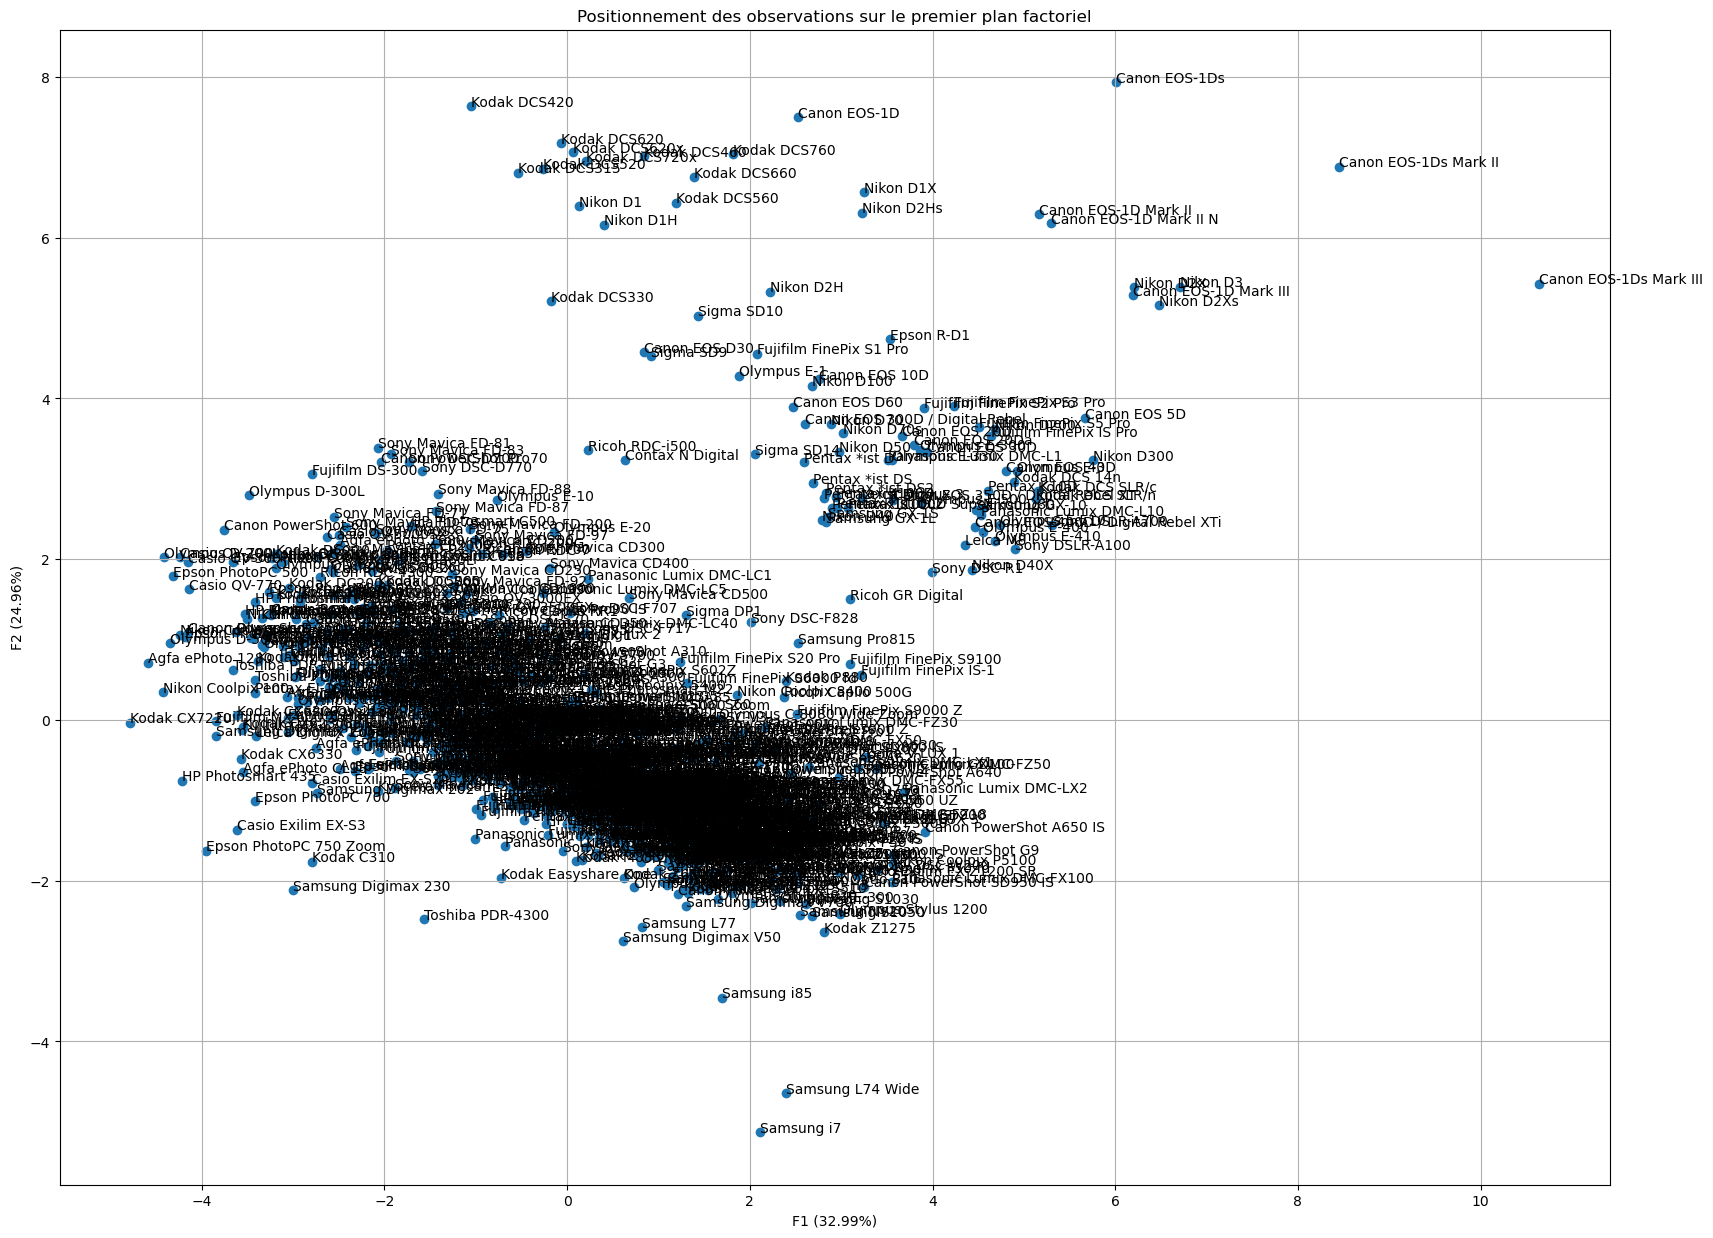

In [177]:
# Affichage du positionnement des observations sur le premier plan factoriel
plt.figure(figsize=(20, 15))
plt.scatter(cameras_acp[:, 0], cameras_acp[:, 1])
plt.title('Positionnement des observations sur le premier plan factoriel')
plt.xlabel('F1 ({}%)'.format(np.round(acp.explained_variance_ratio_[0] * 100, 2)))
plt.ylabel('F2 ({}%)'.format(np.round(acp.explained_variance_ratio_[1] * 100, 2)))
# Ajout des labels des observations
for i, txt in enumerate(cameras_clean.index):
    plt.annotate(cameras.loc[int(txt),'Model'], (cameras_acp[i, 0], cameras_acp[i, 1]))
    #plt.annotate('', (cameras_acp[i, 0], cameras_acp[i, 1]))
plt.grid(True)
plt.show()


- Ce graphique représente le positionnement des individus (observations) sur les deux premiers axes factoriels **(F1, F2)** d'une Analyse en Composantes Principales (ACP). Ces axes factoriels sont issus d'une transformation des données initiales, permettant de résumer l'information contenue dans un grand nombre de variables en un nombre plus réduit de dimensions.

- **Axe F1:** Il semble séparer les modèles en fonction d'une caractéristique liée à la performance ou à la technologie. Les modèles situés à droite de l'axe pourraient avoir des caractéristiques plus avancées que ceux situés à gauche.
- **Axe F2:** Cet axe pourrait représenter une autre dimension de la variabilité, par exemple le prix ou la taille de l'appareil.

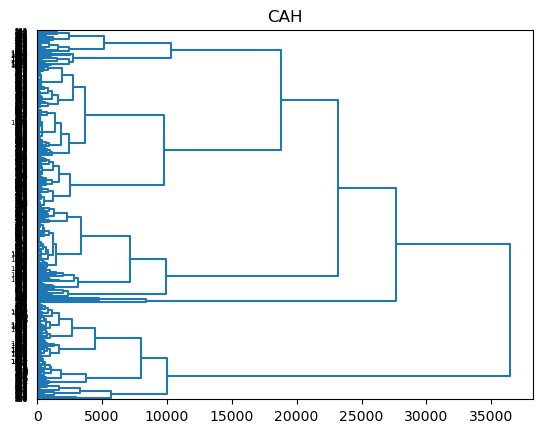

In [178]:
#librairies pour la CAH (classification ascendante hiérarchique)
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#générer la matrice des liens
Z = linkage(cameras_clean,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=cameras_clean.index,orientation='right',color_threshold=0)
plt.show()

Un dendrogramme issu d'une **Classification Ascendante Hiérarchique (CAH)** est une représentation graphique qui permet de visualiser les regroupements successifs d'individus en fonction de leur similarité. Plus deux individus sont proches sur le dendrogramme, plus ils sont similaires selon les critères définis pour la CAH.

- En analysant le dendrogramme généré par l'Analyse Hiérarchique Ascendante (CAH), je constate que les observations de mon dataset de caméras se regroupent progressivement en clusters en fonction de leur similarité. Par exemple, si je coupe à une hauteur de 30 000, le dendrogramme révèle 2 clusters ; à 25 000, il y a 3 clusters ; et en abaissant à 20 000, j'obtiens 4 clusters. En traçant une ligne horizontale au niveau d’une hauteur intermédiaire (environ 10 000-15 000), j’obtiens un découpage en 5 clusters. Cela signifie que les caméras de mon dataset peuvent être segmentées en groupes distincts selon leurs caractéristiques.

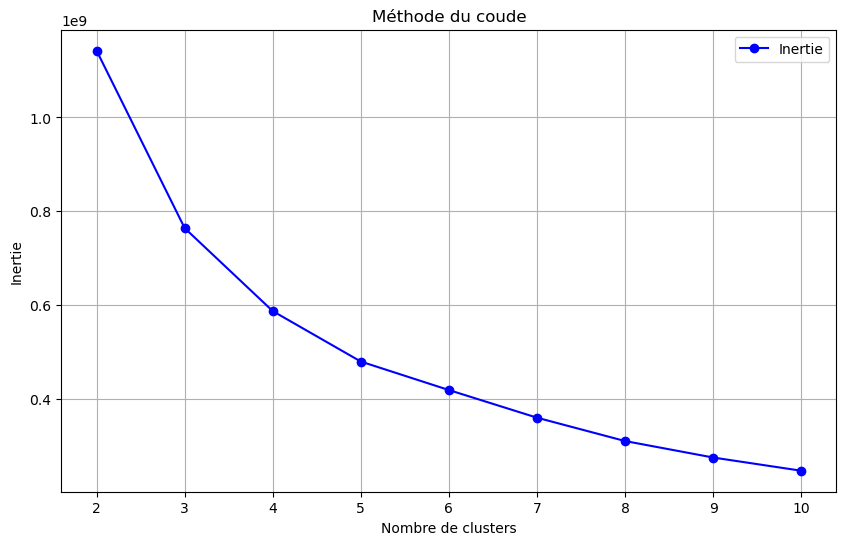

In [179]:
# Trouver le nombre optimal de clusters en utilisant la méthode du coude
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)  # Tester de 2 à 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cameras_clean)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cameras_clean, kmeans.labels_))

# Visualisation de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, 'bo-', label='Inertie')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid(True)
plt.legend()
plt.show()

**La méthode du coude** est une technique utilisée pour déterminer le nombre optimal de clusters dans un algorithme de classification non supervisée, comme K-means. Elle repose sur l'analyse de l'inertie intra-cluster, qui mesure la compacité des clusters. En traçant l'inertie en fonction du nombre de clusters, on observe une diminution progressive de cette inertie à mesure que le nombre de clusters augmente. L'objectif est d'identifier le point où cette diminution ralentit significativement, formant un "coude" sur le graphique.

- En observant la figure, je remarque que l'inertie diminue rapidement entre 2 et 4 clusters, mais le taux de diminution ralentit après 4. Cela suggère que **le nombre optimal de clusters** à choisir, selon cette méthode, est **4**, car c'est à ce niveau que le "coude" est le plus visible. Ce choix permettra de capturer la structure des données tout en évitant un sur-clustering.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


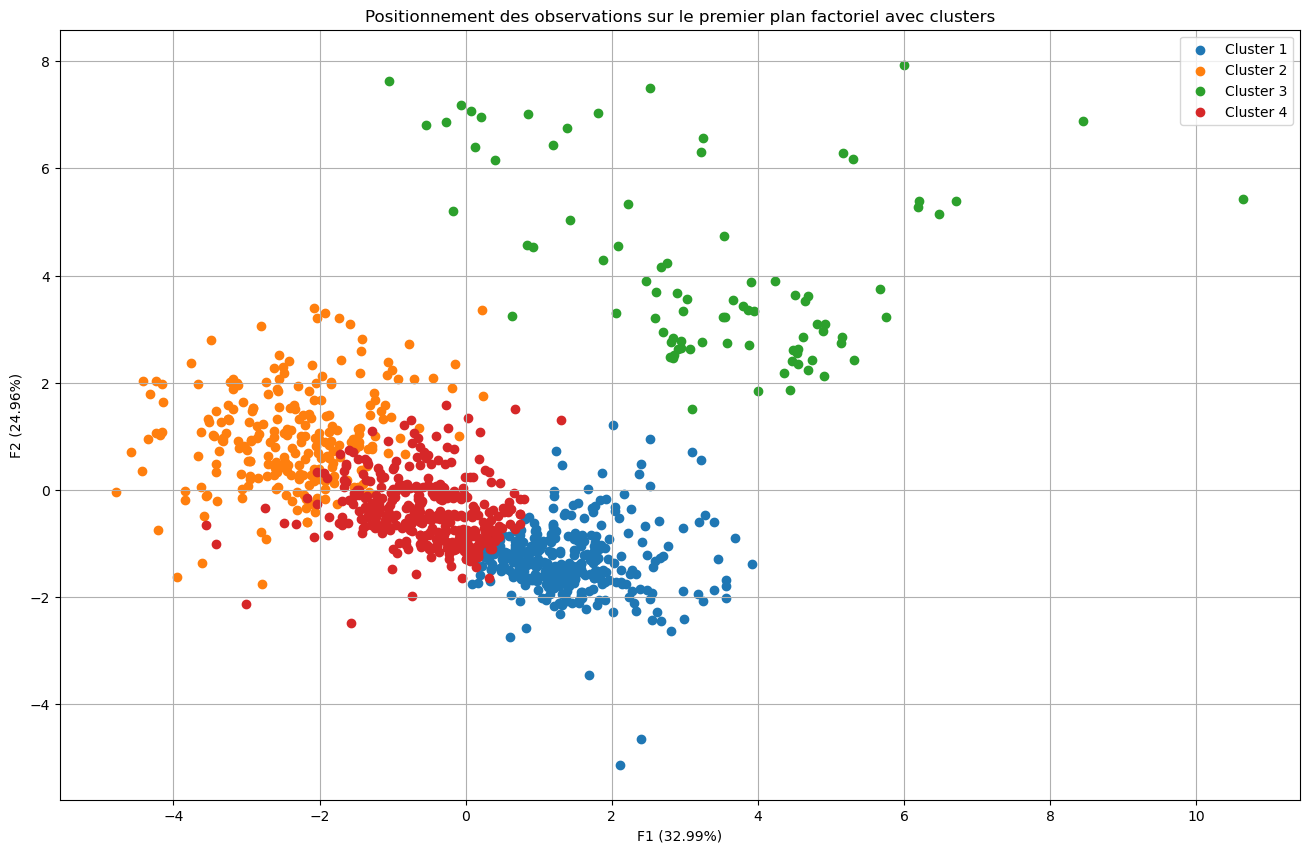

In [180]:
# Nombre optimal de clusters (selon la méthode du coude)
optimal_clusters = 4

# Appliquer K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cameras_clusters = kmeans.fit_predict(cameras_acp)

# Ajouter les informations de cluster au DataFrame original
cameras_clean['Cluster'] = cameras_clusters

# Affichage du positionnement des observations sur le premier plan factoriel avec couleurs par cluster
plt.figure(figsize=(16, 10))
for cluster in range(optimal_clusters):
    plt.scatter(cameras_acp[cameras_clusters == cluster, 0], cameras_acp[cameras_clusters == cluster, 1], label=f'Cluster {cluster + 1}')

plt.title('Positionnement des observations sur le premier plan factoriel avec clusters')
plt.xlabel('F1 ({}%)'.format(np.round(acp.explained_variance_ratio_[0] * 100, 2)))
plt.ylabel('F2 ({}%)'.format(np.round(acp.explained_variance_ratio_[1] * 100, 2)))
plt.legend()
plt.grid(True)
plt.show()

Le graphique factoriel illustre la répartition des modèles sur les deux premières dimensions principales (F1 et F2) qui expliquent ensemble 57.95% de la variance totale. Les clusters identifiés mettent en évidence différentes similarités dans les caractéristiques techniques et commerciales des modèles :
- **Cluster 1 (bleu) :** Représente probablement des modèles compacts et économiques, avec des spécifications techniques modestes (ex. : faible résolution, zoom limité).
- **Cluster 2 (orange) :** Inclut des modèles intermédiaires offrant un compromis entre prix, performances et caractéristiques.
- **Cluster 3 (vert) :** Regroupe les modèles haut de gamme avec des caractéristiques avancées (ex. : résolution élevée, zoom étendu, poids et dimensions plus importants).
- **Cluster 4 (rouge) :** Peut refléter des modèles anciens ou spécialisés, potentiellement avec un stockage limité ou une résolution moindre.